# R Results

In [83]:
import pandas as pd

# Load the AUC results from the CSV file
file_path = "data/augur_R_auc_results.csv"
auc_results = pd.read_csv(file_path)

print(auc_results)

   cell_type       auc
0  CellTypeC  0.971714
1  CellTypeB  0.889152
2  CellTypeA  0.596406


# Results from Augur Python Implementation

In [74]:
import pertpy as pt

adata = pt.dt.sc_sim_augur()
ag_rfc = pt.tl.Augur("random_forest_classifier")
loaded_data = ag_rfc.load(adata)

# predict with with select variance feature selection
v_adata, v_results = ag_rfc.predict(loaded_data, subsample_size=20, n_threads=16, augur_mode='velocity')
print(v_results["summary_metrics"])

! Set smaller span value in the case of a `segmentation fault` error.
! Set larger span in case of svddc or other near singularities error.


                  CellTypeA  CellTypeB  CellTypeC
mean_augur_score   0.611190   0.959773   0.998390
mean_auc           0.611190   0.959773   0.998390
mean_accuracy      0.557033   0.847363   0.952747
mean_precision     0.581258   0.905384   0.962246
mean_f1            0.461279   0.833915   0.951805
mean_recall        0.459206   0.814444   0.953968


# Testing for velocity 

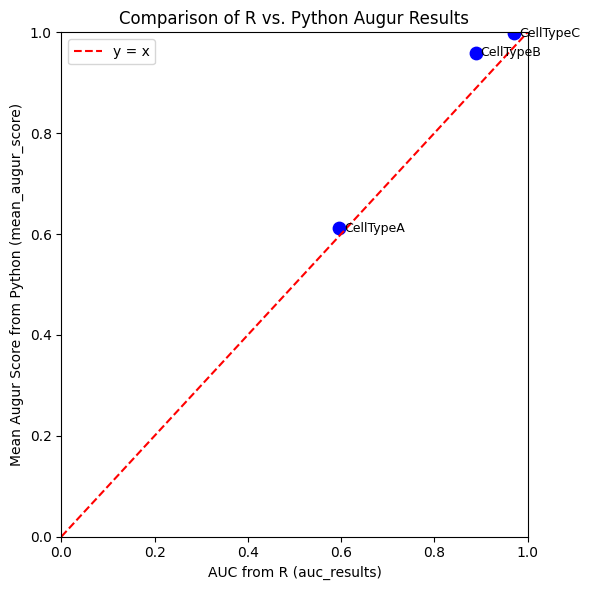

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the R-based AUC results (CSV)
file_path = "data/augur_R_auc_results.csv"
auc_results = pd.read_csv(file_path)  # columns: [cell_type, auc]

# 2. Extract the Python-based mean_augur_score from v_results
#    (assuming you already have v_results = ag_rfc.predict(...)[1])
summary_metrics = v_results["summary_metrics"]
# summary_metrics is a DataFrame with rows like mean_augur_score, mean_auc, etc.
# and columns like [CellTypeA, CellTypeB, CellTypeC]

# We want the row "mean_augur_score" (a Series where index=cell_types, value=scores).
py_scores = summary_metrics.loc["mean_augur_score"]  # e.g. CellTypeA=0.61, CellTypeB=0.95, ...

# Convert that Series into a DataFrame with columns [cell_type, python_score].
py_scores_df = py_scores.reset_index()
py_scores_df.columns = ["cell_type", "python_score"]

# 3. Merge the R results with the Python scores by cell_type
merged_df = pd.merge(auc_results, py_scores_df, on="cell_type")
# merged_df will have columns: [cell_type, auc, python_score]

# 4. Create the scatter plot
plt.figure(figsize=(6, 6))

# Plot each cell type point
plt.scatter(merged_df["auc"], merged_df["python_score"], s=80, color="blue")

# Add text labels near each point
for i, row in merged_df.iterrows():
    plt.text(row["auc"] + 0.01, row["python_score"], row["cell_type"], 
             fontsize=9, verticalalignment='center')

# 5. Add the diagonal line (y=x)
plt.plot([0, 1], [0, 1], ls="--", c="red", label="y = x")

# (Optional) You can adjust xlim/ylim to ensure everything is visible
plt.xlim(0, 1)
plt.ylim(0, 1)

plt.xlabel("AUC from R (auc_results)")
plt.ylabel("Mean Augur Score from Python (mean_augur_score)")
plt.title("Comparison of R vs. Python Augur Results")

plt.legend()
plt.tight_layout()
plt.show()


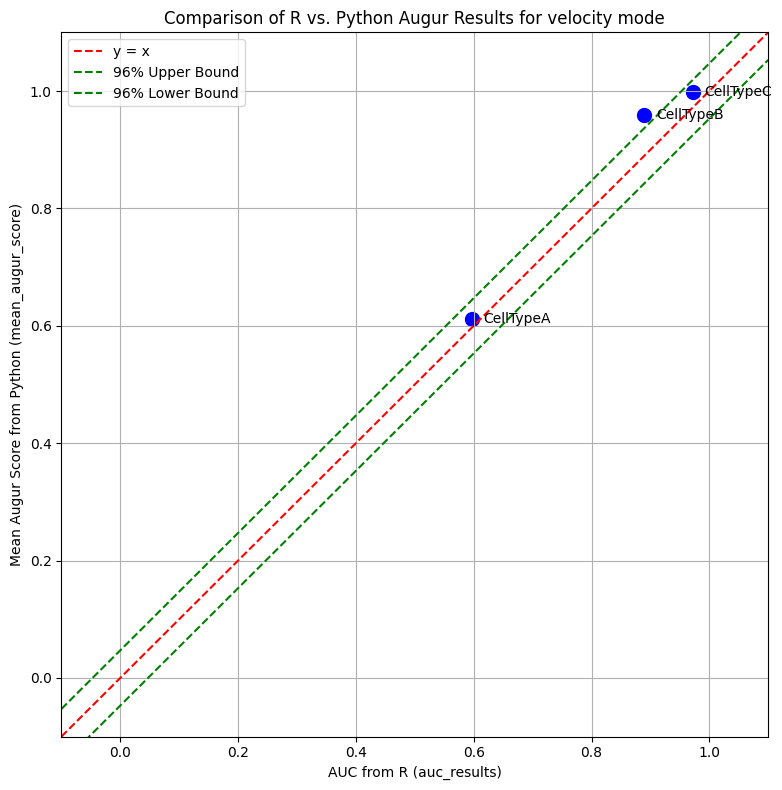

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Load the R-based AUC results (CSV)
file_path = "data/augur_R_auc_results.csv"
auc_results = pd.read_csv(file_path)  # columns: [cell_type, auc]

# 2. Extract the Python-based mean_augur_score from v_results
summary_metrics = v_results["summary_metrics"]
py_scores = summary_metrics.loc["mean_augur_score"]  # Extracts row as Series

# Convert to DataFrame
py_scores_df = py_scores.reset_index()
py_scores_df.columns = ["cell_type", "python_score"]

# 3. Merge the R results with the Python scores by cell_type
merged_df = pd.merge(auc_results, py_scores_df, on="cell_type")

# 4. Compute the 96% confidence interval
differences = merged_df["python_score"] - merged_df["auc"]
std_diff = np.std(differences)
ci_96 = 1.96 * std_diff  # 96% confidence interval

# 5. Create the scatter plot with larger axis range
plt.figure(figsize=(8, 8))  # Increased plot size for clarity

# Plot each cell type point
plt.scatter(merged_df["auc"], merged_df["python_score"], s=100, color="blue")

# Add text labels near each point
for i, row in merged_df.iterrows():
    plt.text(row["auc"] + 0.02, row["python_score"], row["cell_type"], 
             fontsize=10, verticalalignment='center')

# 6. Add reference lines
x_vals = np.linspace(-0.1, 1.1, 100)  # Adjusted to match new axis limits
plt.plot(x_vals, x_vals, ls="--", c="red", label="y = x")  # Diagonal y=x line
plt.plot(x_vals, x_vals + ci_96, ls="--", c="green", label="96% Upper Bound")  # Upper bound
plt.plot(x_vals, x_vals - ci_96, ls="--", c="green", label="96% Lower Bound")  # Lower bound

# 7. Adjust x and y limits to see all points clearly
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)

plt.xlabel("AUC from R (auc_results)")
plt.ylabel("Mean Augur Score from Python (mean_augur_score)")
plt.title("Comparison of R vs. Python Augur Results for velocity mode")

plt.legend()
plt.grid(True)  # Optional: Adds a grid for better readability
plt.tight_layout()
plt.show()


# Testing for Default

! Set smaller span value in the case of a `segmentation fault` error.
! Set larger span in case of svddc or other near singularities error.


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested

                  CellTypeA  CellTypeB  CellTypeC
mean_augur_score   0.563209   0.818073   0.926848
mean_auc           0.563209   0.818073   0.926848
mean_accuracy      0.524505   0.683040   0.780037
mean_precision     0.497219   0.743367   0.842485
mean_f1            0.422230   0.635382   0.752779
mean_recall        0.436032   0.650159   0.747778


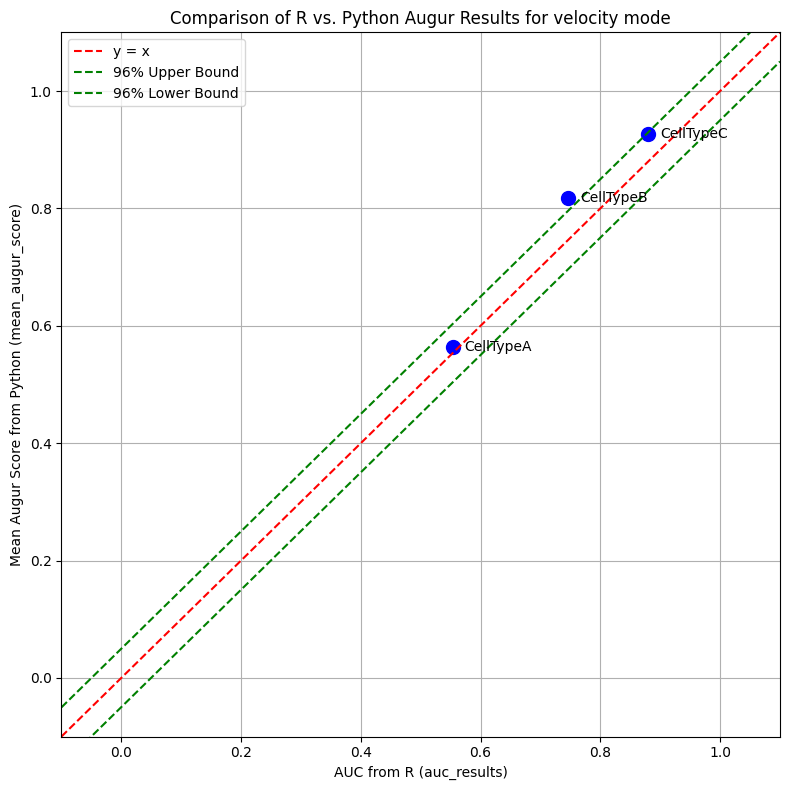

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pertpy as pt

# 1. Load the R-based AUC results (CSV)
file_path = "data/augur_R_auc_results_default.csv"
auc_results = pd.read_csv(file_path)  # columns: [cell_type, auc]

adata = pt.dt.sc_sim_augur()
ag_rfc = pt.tl.Augur("random_forest_classifier")
loaded_data = ag_rfc.load(adata)

# predict with with select variance feature selection
v_adata, v_results = ag_rfc.predict(loaded_data, subsample_size=20, n_threads=16, augur_mode='default')
print(v_results["summary_metrics"])

# 2. Extract the Python-based mean_augur_score from v_results
summary_metrics = v_results["summary_metrics"]
py_scores = summary_metrics.loc["mean_augur_score"]  # Extracts row as Series

# Convert to DataFrame
py_scores_df = py_scores.reset_index()
py_scores_df.columns = ["cell_type", "python_score"]

# 3. Merge the R results with the Python scores by cell_type
merged_df = pd.merge(auc_results, py_scores_df, on="cell_type")

# 4. Compute the 96% confidence interval
differences = merged_df["python_score"] - merged_df["auc"]
std_diff = np.std(differences)
ci_96 = 1.96 * std_diff  # 96% confidence interval

# 5. Create the scatter plot with larger axis range
plt.figure(figsize=(8, 8))  # Increased plot size for clarity

# Plot each cell type point
plt.scatter(merged_df["auc"], merged_df["python_score"], s=100, color="blue")

# Add text labels near each point
for i, row in merged_df.iterrows():
    plt.text(row["auc"] + 0.02, row["python_score"], row["cell_type"], 
             fontsize=10, verticalalignment='center')

# 6. Add reference lines
x_vals = np.linspace(-0.1, 1.1, 100)  # Adjusted to match new axis limits
plt.plot(x_vals, x_vals, ls="--", c="red", label="y = x")  # Diagonal y=x line
plt.plot(x_vals, x_vals + ci_96, ls="--", c="green", label="96% Upper Bound")  # Upper bound
plt.plot(x_vals, x_vals - ci_96, ls="--", c="green", label="96% Lower Bound")  # Lower bound

# 7. Adjust x and y limits to see all points clearly
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)

plt.xlabel("AUC from R (auc_results)")
plt.ylabel("Mean Augur Score from Python (mean_augur_score)")
plt.title("Comparison of R vs. Python Augur Results for default mode")

plt.legend()
plt.grid(True)  # Optional: Adds a grid for better readability
plt.tight_layout()
plt.show()
